In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_transunion = pd.read_csv("data/aggregated_data.csv")
df_demographics = pd.read_csv("data/demographics_agg.csv")

In [3]:
df_transunion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450090 entries, 0 to 450089
Data columns (total 7 columns):
PostalCd    450090 non-null object
Count       450090 non-null float64
Sum         450090 non-null float64
Min         450090 non-null float64
Max         450090 non-null float64
Mean        450090 non-null float64
Std         450090 non-null float64
dtypes: float64(6), object(1)
memory usage: 24.0+ MB


In [4]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793411 entries, 0 to 793410
Data columns (total 57 columns):
PostCode                                       793411 non-null object
Age                                            793411 non-null float64
Family Size                                    793411 non-null float64
Income                                         793411 non-null float64
Family Income                                  793411 non-null float64
Immigration_Immigrants                         793411 non-null float64
Immigration_Non-immigrants                     793411 non-null float64
Gender_Female                                  793411 non-null float64
Gender_Male                                    793411 non-null float64
Ownership_Band housing                         793411 non-null float64
Ownership_Owned                                793411 non-null float64
Ownership_Rented                               793411 non-null float64
Dwelling_Apartment                    

## Transunion have less rows than aggregated individual data. Join  both together

In [5]:
df_merged = pd.merge(
    df_demographics, df_transunion, 
    how='inner', left_on="PostCode", right_on="PostalCd"
)

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444495 entries, 0 to 444494
Data columns (total 64 columns):
PostCode                                       444495 non-null object
Age                                            444495 non-null float64
Family Size                                    444495 non-null float64
Income                                         444495 non-null float64
Family Income                                  444495 non-null float64
Immigration_Immigrants                         444495 non-null float64
Immigration_Non-immigrants                     444495 non-null float64
Gender_Female                                  444495 non-null float64
Gender_Male                                    444495 non-null float64
Ownership_Band housing                         444495 non-null float64
Ownership_Owned                                444495 non-null float64
Ownership_Rented                               444495 non-null float64
Dwelling_Apartment                    

In [7]:
df_merged.drop("PostalCd", inplace=True, axis=1)

In [8]:
correlation = df_merged.corr()

In [9]:
correlation[(correlation["Mean"] > 0.2) | (correlation["Mean"] < -0.2)]["Mean"]

Immigration_Immigrants                  -0.217007
Immigration_Non-immigrants               0.217007
Ownership_Owned                          0.422590
Ownership_Rented                        -0.420297
Dwelling_Other                          -0.284260
Dwelling_Single-detached house           0.329891
Education_Postsecondary                  0.217434
Ethnicity_North American                 0.236204
Commute_Car, truck, van - as a driver    0.417017
Commute_Public transit                  -0.292499
Commute_Walked                          -0.286148
Marital Status_Never married            -0.267749
Min                                      0.237518
Max                                      0.447732
Mean                                     1.000000
Std                                      0.685337
Name: Mean, dtype: float64

In [10]:
correlated_cols = correlation[(correlation["Mean"] > 0.2) | (correlation["Mean"] < -0.2)].index

In [11]:
len(correlated_cols)

16

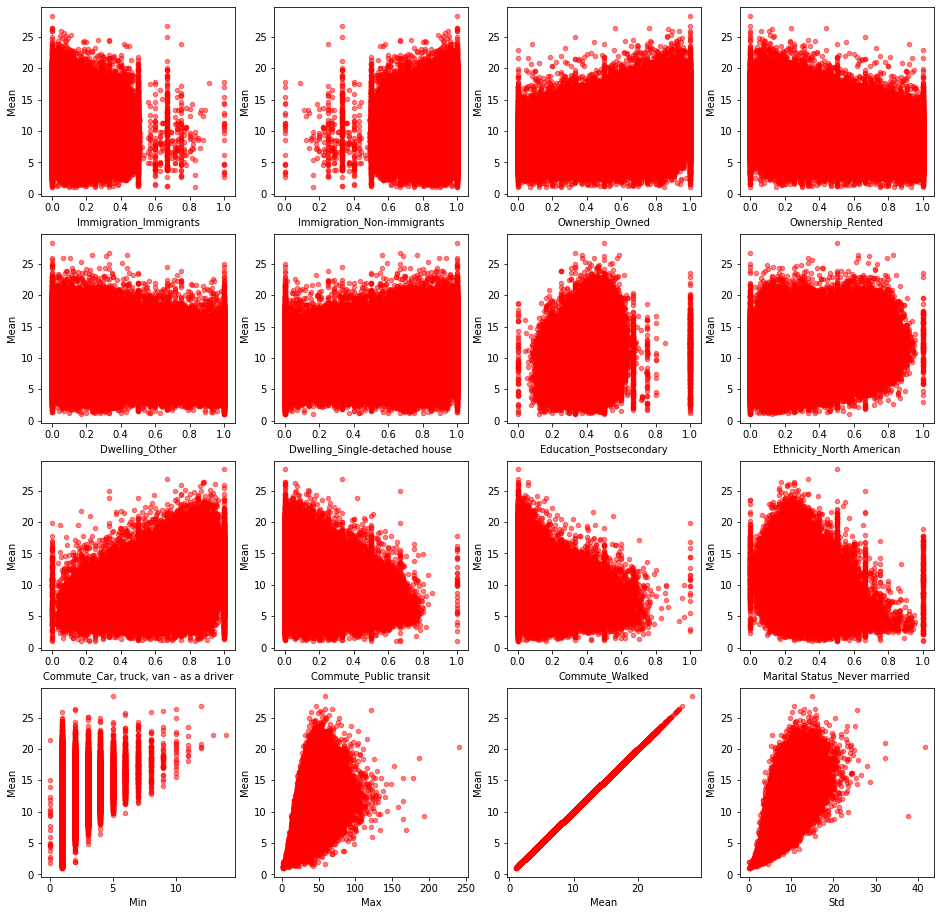

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for xcol, ax in zip(correlated_cols, axes.reshape(-1)):
    df_merged.plot(kind='scatter', x=xcol, y='Mean', ax=ax, alpha=0.5, color='r')